<a href="https://colab.research.google.com/github/S-AILAB/Linear-and-Multiple-Linear-Regression-Analysis/blob/main/Linear_Regression_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression and Multiple Linear Regression
## 1. Business Problem
The goal of this assignment is to analyze how different company expenditures impact profit. Specifically, we aim to assess if increasing spending in areas like R&D, Administration, and Marketing drives profitability, and to what extent each category contributes to overall profit.

##Import all the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##Reading the data

In [ ]:
df = pd.read_csv("/content/50_Startups.csv")

##Understanding the data

In [ ]:
df.columns

Index(['R_D_spent', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

In [ ]:
display(df.head(5))

,R_D_spent,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


**Observation:**

*   Data has both independent as well as dependent variable.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_D_spent        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


**Observation**

*   Data has both Continuous(numerical) as well as Categorical column.

In [ ]:
df.describe()

,R_D_spent,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

##Feature Engineering

Checking for nulls

In [ ]:
df.isnull().sum()

,0
R_D_spent,0
Administration,0
Marketing_Spend,0
State,0
Profit,0


Checking for duplicates

In [ ]:
print(df.duplicated().sum())

0


##Checking for outlier and treating them

In [ ]:
df.columns

Index(['R_D_spent', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

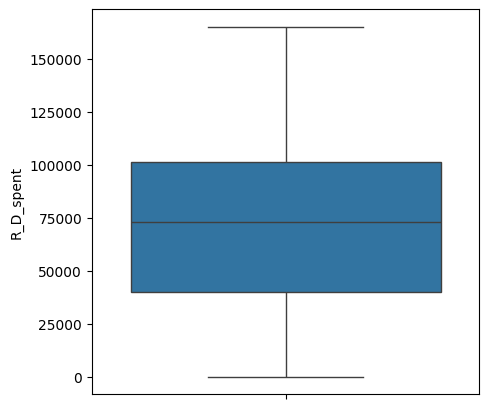

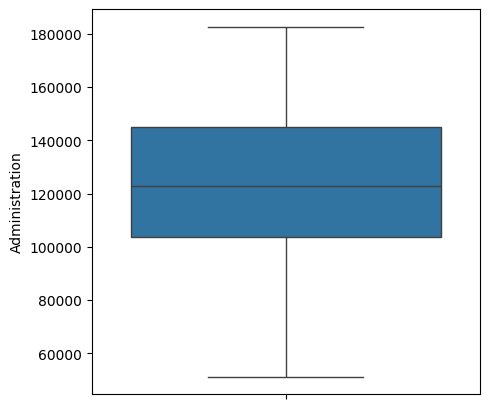

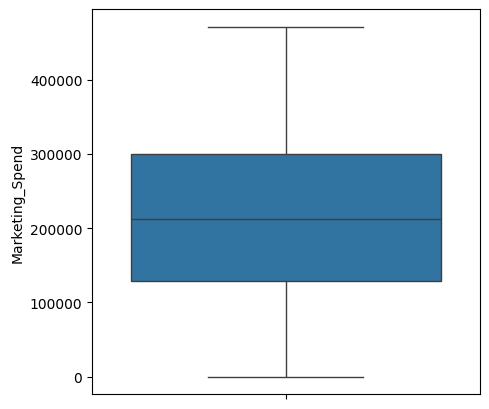

In [ ]:
cols = ['R_D_spent', 'Administration', 'Marketing_Spend']
for indx, col in enumerate(cols):
  plt.figure(figsize=(5,5))
  sns.boxplot(df[col])
  plt.show()

**Observation** No outliers are found.

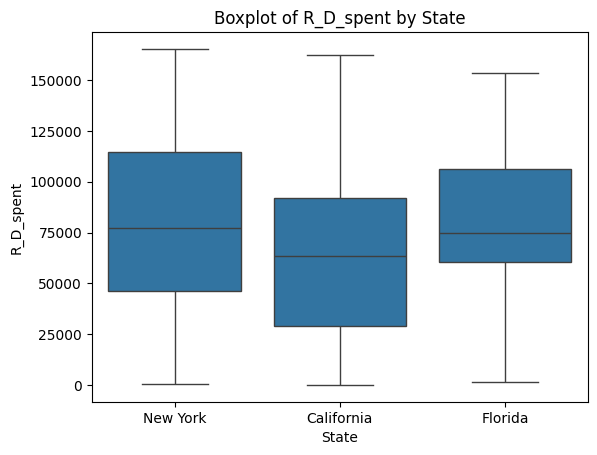

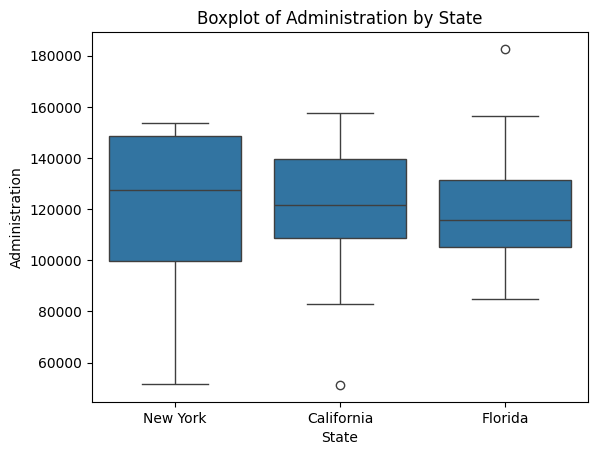

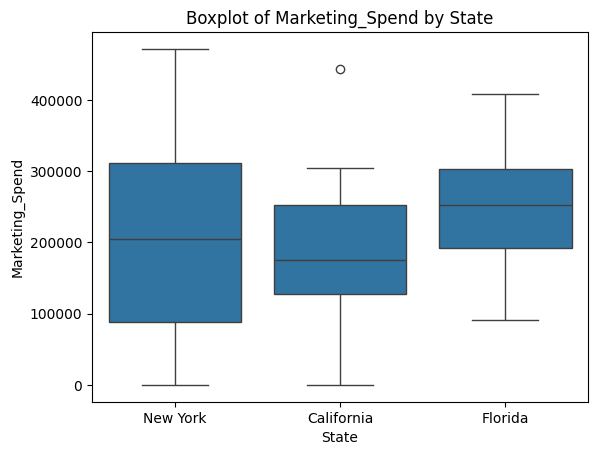

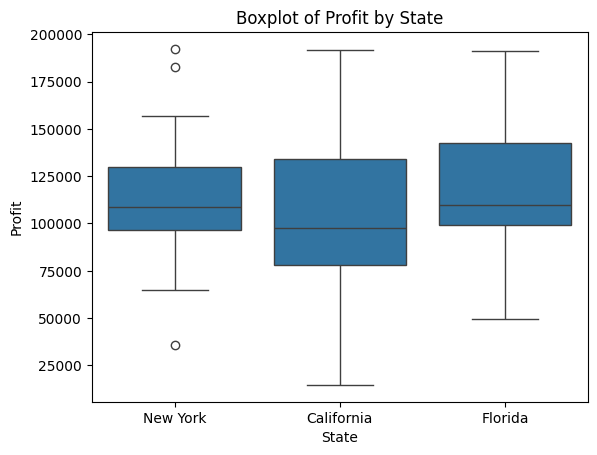

In [ ]:
for i in cols:
  sns.boxplot(data = df , x = 'State', y = i)
  plt.title(f"Boxplot of {i} by State")
  plt.xlabel("State")
  plt.ylabel(i)
  plt.show()

sns.boxplot(data = df , x = 'State', y = 'Profit')
plt.title(f"Boxplot of Profit by State")
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

##EDA

Univariate and Bi-Variate Analysis

In [ ]:
df.columns

Index(['R_D_spent', 'Administration', 'Marketing_Spend', 'State', 'Profit'], dtype='object')

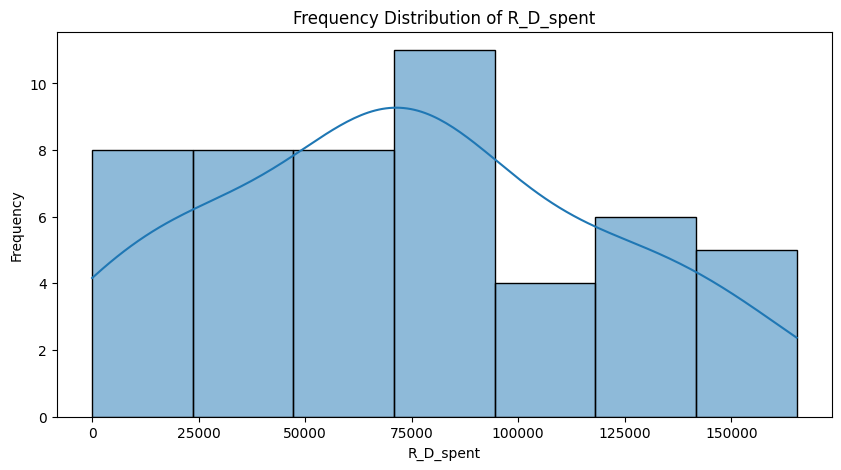

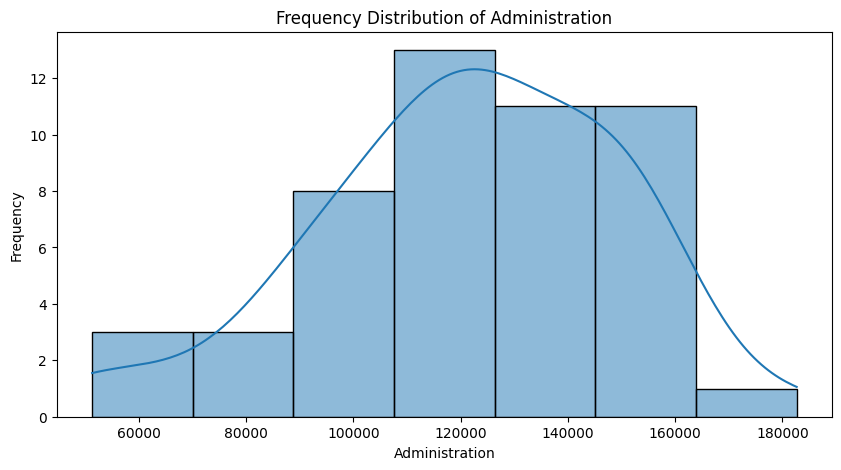

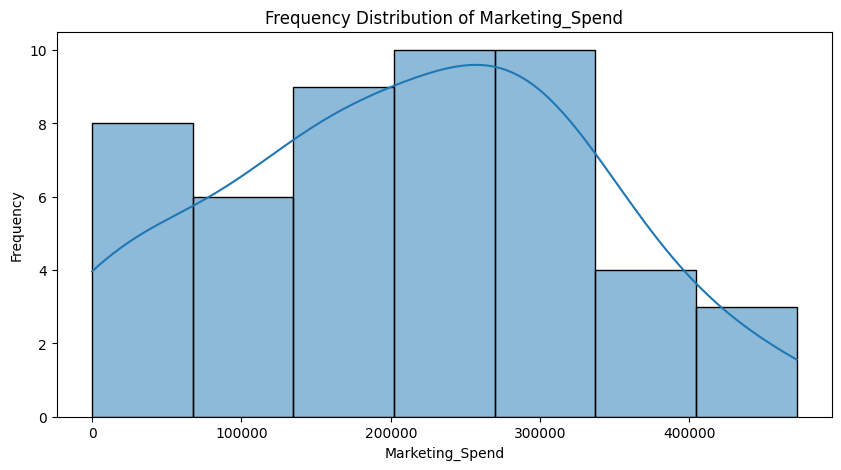

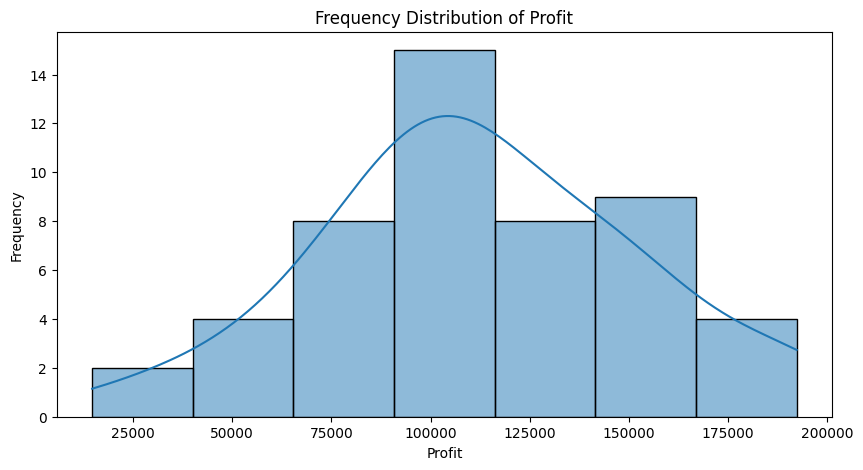

In [ ]:
# Univariate Analysis: Numerical Data
cols = ['R_D_spent', 'Administration', 'Marketing_Spend', 'Profit']
for i in cols:
  plt.figure(figsize = (10,5))
  sns.histplot(data = df, x=i, kde = True)
  plt.title(f'Frequency Distribution of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()

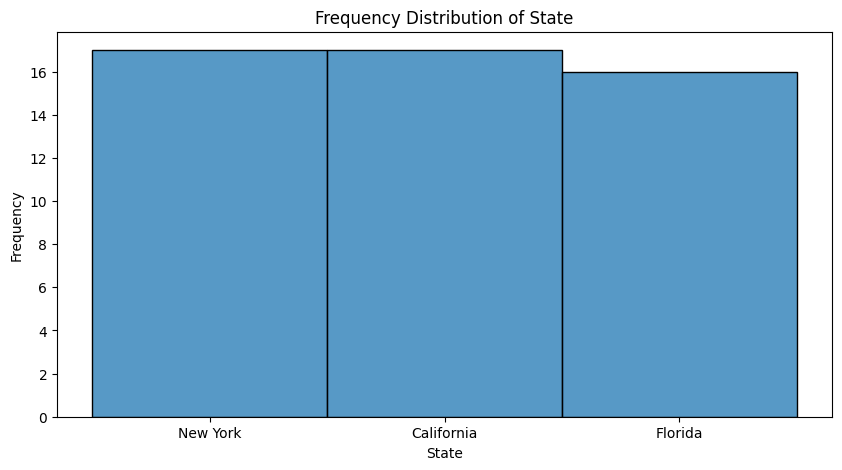

In [ ]:
# Univariate Analysis: Categorical Data
plt.figure(figsize=(10,5))
sns.histplot(data = df, x = 'State')
plt.title('Frequency Distribution of State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.show()

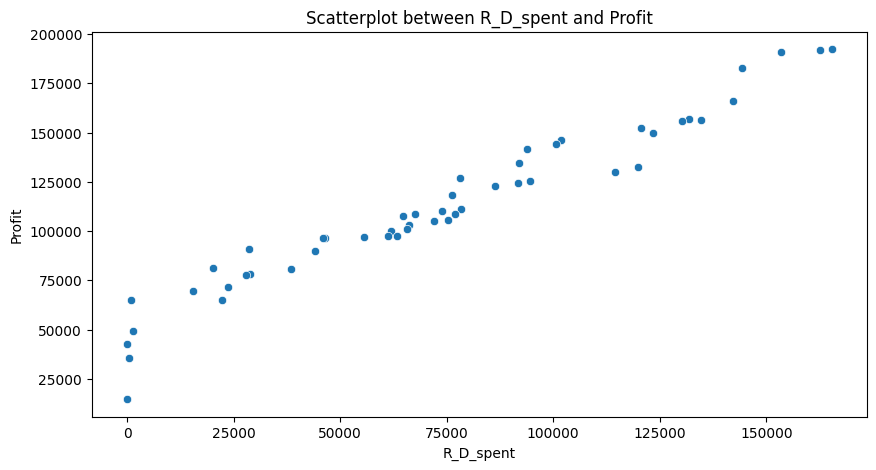

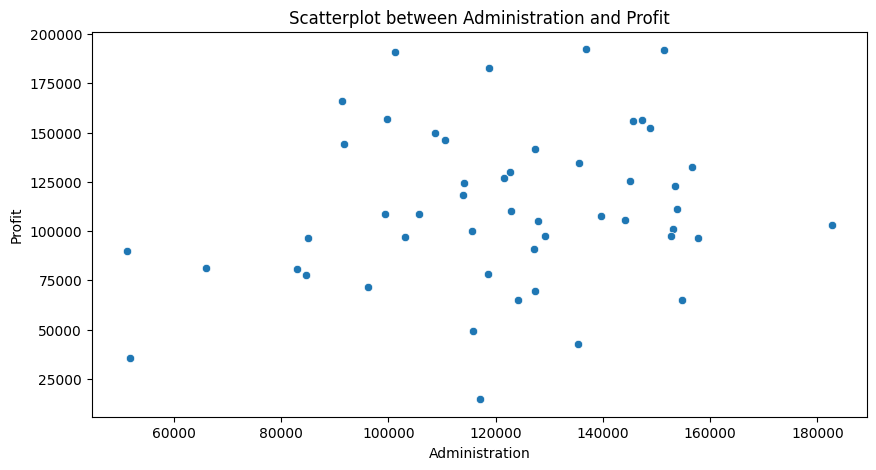

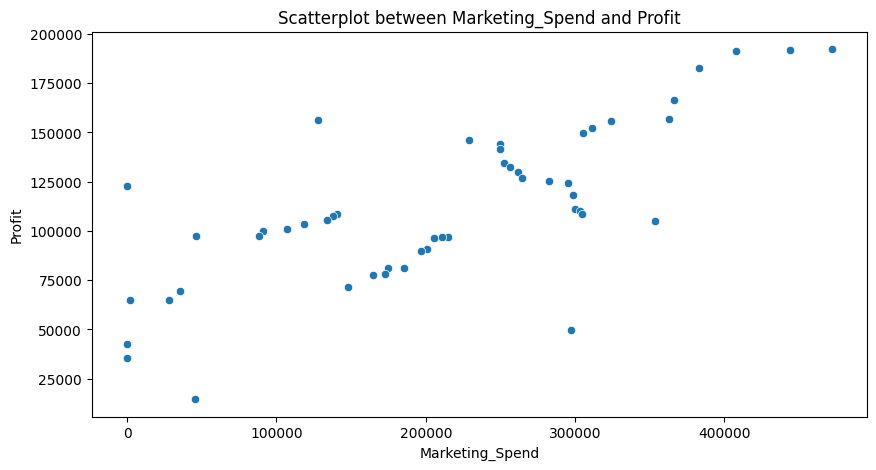

In [ ]:
#bivariate analysis for Numerical vs Numerical(Profit)
cols = ['R_D_spent', 'Administration', 'Marketing_Spend']
for i in cols:
  plt.figure(figsize = (10,5))
  sns.scatterplot(data = df, x = i, y = 'Profit')
  plt.title(f"Scatterplot between {i} and Profit")
  plt.xlabel(i)
  plt.ylabel('Profit')
  plt.show()

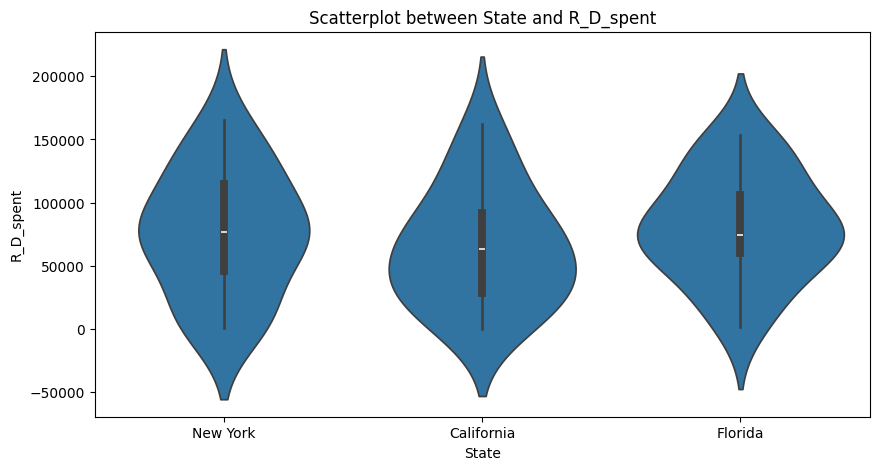

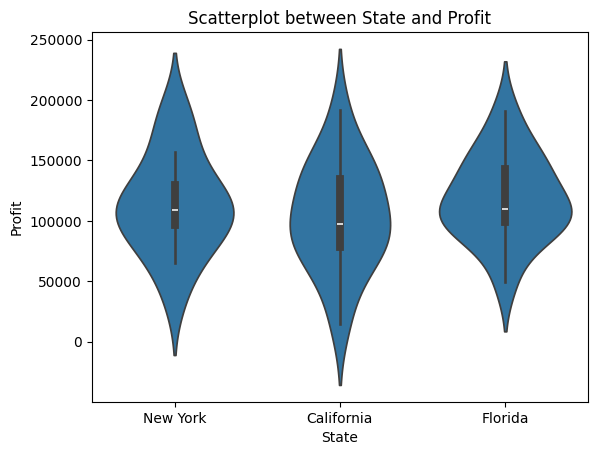

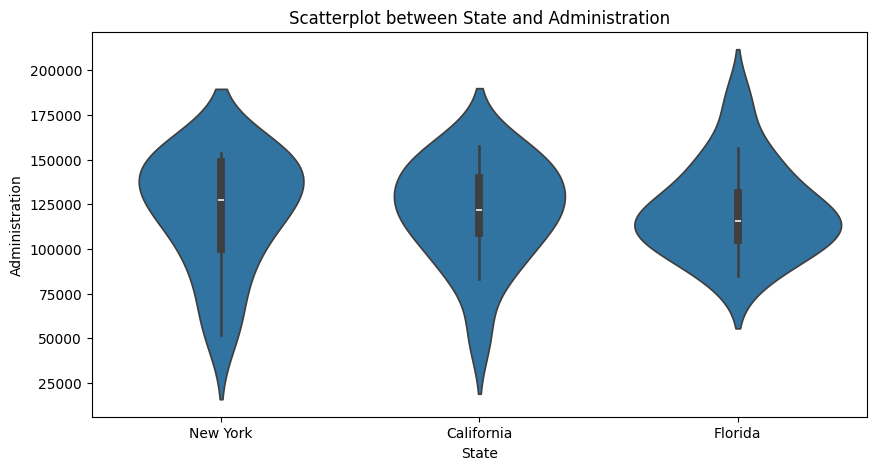

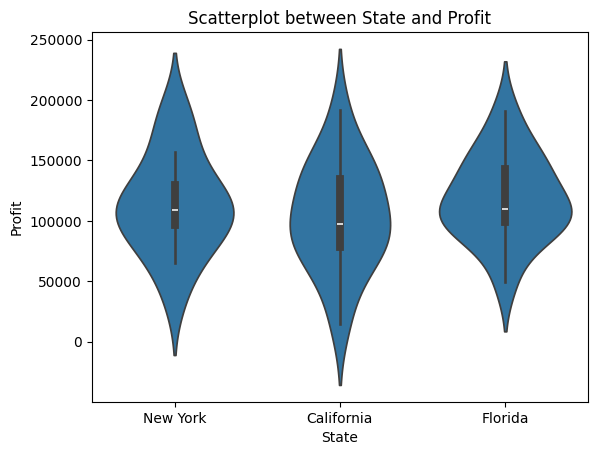

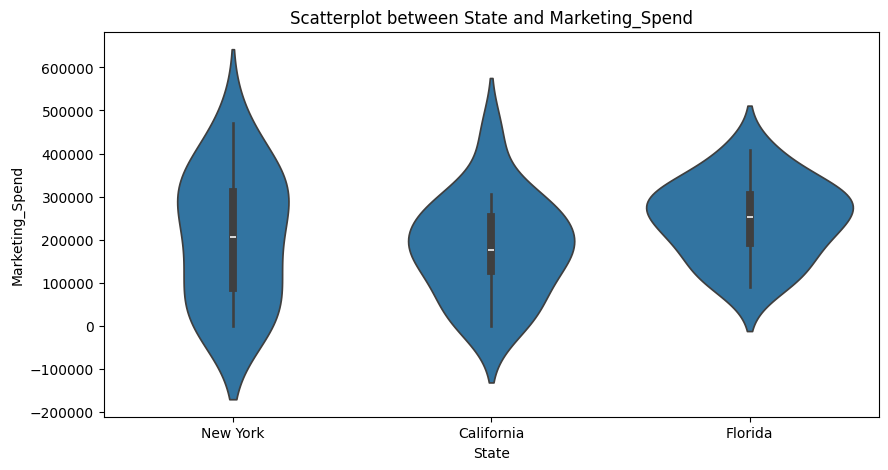

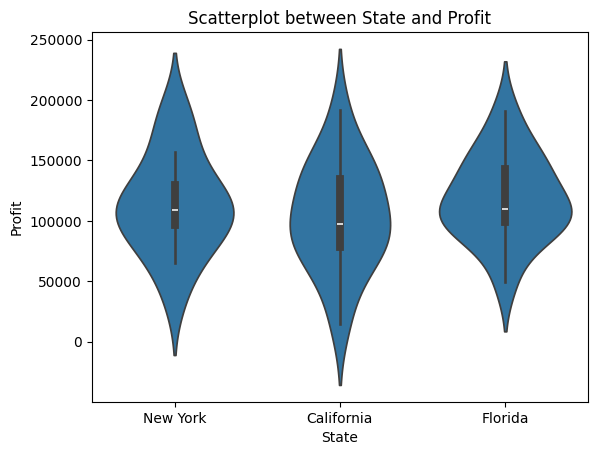

In [ ]:
# Bivariate Analysis: Categorical vs Numerical Relationships
for i in cols:
  plt.figure(figsize = (10,5))
  sns.violinplot(data = df, x = 'State', y = i)
  plt.title(f"Scatterplot between State and {i}")
  plt.xlabel("State")
  plt.ylabel(i)
  plt.show()

  sns.violinplot(data = df, x = 'State', y = 'Profit')
  plt.title(f"Scatterplot between State and Profit")
  plt.xlabel("State")
  plt.ylabel("Profit")
  plt.show()

##converting categorical column (State) into numerical value via encoding them using label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

In [ ]:
display(df.head(5))

,R_D_spent,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


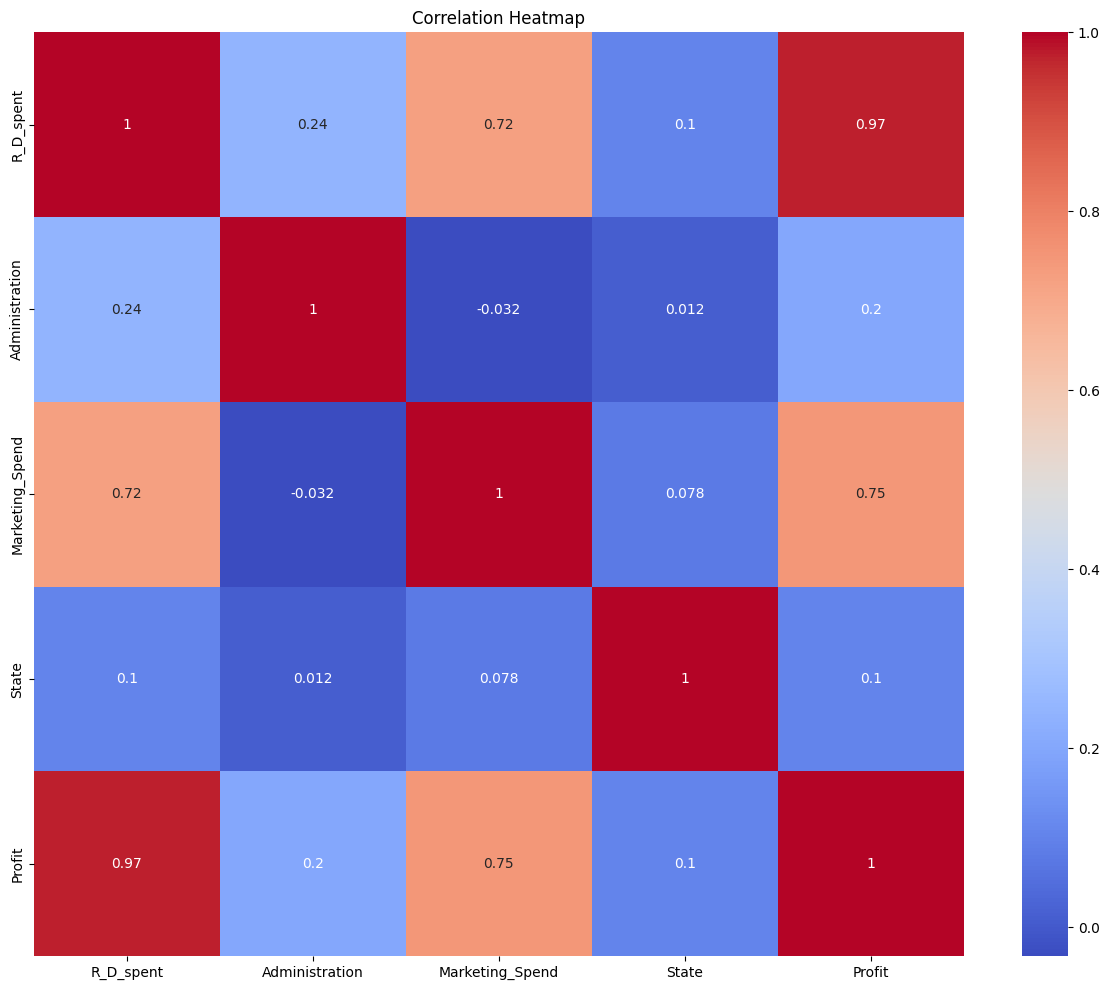

In [ ]:
# Correlation Analysis: Heatmap
plt.figure(figsize=(15,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Spliting the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop('Profit', axis =1)
y = df['Profit']

Splitting the dat

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
x_train.head(5)

,R_D_spent,Administration,Marketing_Spend,State
8,120542.52,148718.95,311613.29,2
3,144372.41,118671.85,383199.62,2
6,134615.46,147198.87,127716.82,0
41,27892.92,84710.77,164470.71,1
46,1315.46,115816.21,297114.46,1


In [ ]:
x_test.head(5)

,R_D_spent,Administration,Marketing_Spend,State
13,91992.39,135495.07,252664.93,0
39,38558.51,82982.09,174999.30,0
30,61994.48,115641.28,91131.24,1
45,1000.23,124153.04,1903.93,2
17,94657.16,145077.58,282574.31,2


In [ ]:
y_train.head(5)

,Profit
8,152211.77
3,182901.99
6,156122.51
41,77798.83
46,49490.75


In [ ]:
y_test.head(5)

,Profit
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37


##Model Training and Prediction

In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
print("Intercept:", linear_regression.intercept_)
print("Coefficients:", linear_regression.coef_)

Intercept: 56534.958889836904
Coefficients: [ 8.09559857e-01 -8.94928622e-02  3.06256651e-02 -1.80471955e+02]


Prediction

In [ ]:
y_predict = linear_regression.predict(x_test)

In [ ]:
print("Predicted Values: \n", y_predict[:5])

Predicted Values: 
 [126620.49493921  85683.54596711  98984.61503293  45931.25925851
 128475.2702596 ]


##Model performance

In [ ]:
# R_square
r2 = r2_score(y_test, y_predict)
print("R2 Square: ", r2)

#MSE
mse = mean_squared_error(y_test, y_predict)
print("Means Squared Error: ", mse)

#RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)

R2 Square:  0.9190953762348169
Means Squared Error:  86953191.30028795
Root Mean Squared Error:  9324.869505804783


R2 Square: 91.9% of the variance in the target variable (e.g., Profit). That’s generally considered very good.

Means Squared Error: average squared difference between predicted and actual values. Lower is better — you want predictions close to actual values.

Root Mean Squared Error: SQRT of MSE.



## Model Interpretation and Tuning

**Checking the Lineraity by plotting Residual scatter plot**

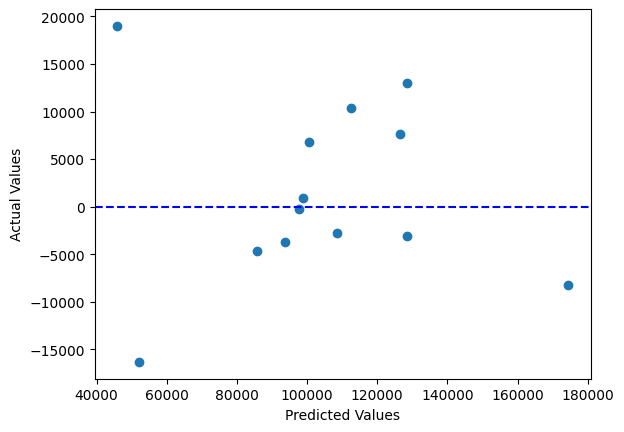

In [ ]:
plt.scatter( y_predict, y_test - y_predict)
#y_test - y_predict calculates the residuals — that is, the errors your model made for each prediction
plt.axhline(y=0,color ='b',linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()


# Residual Plot Analysis

## Observations:

1. **Random Scatter**:
   - The residuals are scattered above and below the red dashed line (residual = 0), which is a good indication that the model doesn't have a systematic bias.  

2. **Presence of Patterns**:
   - There seems to be a slight trend where residuals increase or decrease with predicted values, especially at the lower and upper ends of the plot.  
   - This suggests **heteroscedasticity**, where the error variance changes across the range of predicted values.

3. **Outliers**:
   - A few residuals are significantly far from the zero line (e.g., above 10,000 or below -10,000).  
   - These outliers could indicate areas where the model struggles to make accurate predictions.

4. **Range of Residuals**:
   - Residuals range approximately between **-18,000 to 18,000**, indicating some significant errors in predictions.


Normality of Residuals

<Axes: xlabel='Profit', ylabel='Count'>

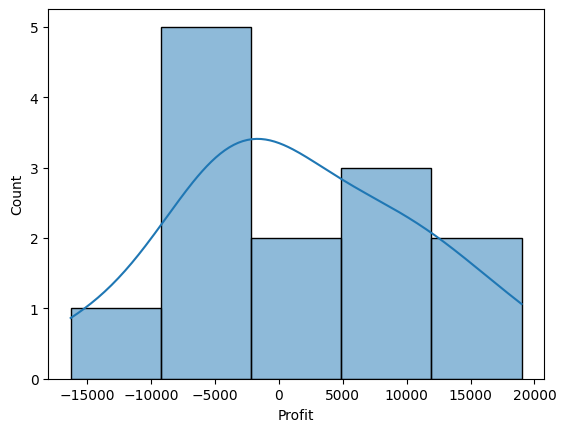

In [ ]:
sns.histplot(y_test - y_predict, kde = True)

**Residuals Distribution Analysis**

**Observations:**

**Peak around Zero**: The histogram shows a clear peak around zero, which is a good indication that the model's predictions are centered around the actual values.

**Approximation of Normal Distribution**: The density curve overlaid on the histogram suggests that the residuals generally follow a bell shape, which is characteristic of a normal distribution.

**Deviations from Perfect Normality**: While the distribution is roughly normal, it's not perfectly symmetric. There appears to be some slight skewness. This could indicate that the model might be slightly underestimating or overestimating in certain ranges of predictions.

## Checking Multicollinearity

even with a high R-squared, checking for multicollinearity is a good practice for ensuring the interpretability, stability, and potential for further improvement of your linear regression model.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# Add a constant for VIF calculation
X_with_const = sm.add_constant(x)

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(1, X_with_const.shape[1])]

print(vif)


          Features       VIF
0        R_D_spent  2.481178
1   Administration  1.175315
2  Marketing_Spend  2.326780
3            State  1.011281


The VIF values are all well below the commonly used threshold of 5 or 10. This indicates that there is no significant multicollinearity among your independent variables.

Therefore, you do not need to use Lasso or Ridge regression to address multicollinearity. Your current linear regression model should be stable and interpretable in this regard.

## App

In [ ]:
# Apply Lasso Regression
    lasso_regression = Lasso(alpha=1.0) # You can tune the alpha value
    lasso_regression.fit(x_train, y_train)
    y_predict_lasso = lasso_regression.predict(x_test)

    # Evaluate Lasso Regression
    r2_lasso = r2_score(y_test, y_predict_lasso)
    mse_lasso = mean_squared_error(y_test, y_predict_lasso)
    rmse_lasso = np.sqrt(mse_lasso)

    print("\nLasso Regression Performance:")
    print("R2 Square:", r2_lasso)
    print("Mean Squared Error:", mse_lasso)
    print("Root Mean Squared Error:", rmse_lasso)